In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [2]:
import sys
import os

import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

from datetime import datetime

utils.reset_seeds(0)

# 
Stackoverflow mis kinnitab praegust valemit: https://stats.stackexchange.com/questions/521091/optimizing-gaussian-negative-log-likelihood

In [40]:
# mean, sigma
# sigma on std ehk sqrt(variance) (see teine argument)
sigma = 0.1
logvar = np.log(sigma**2)
print(f"sigma: {sigma}, logvar: {logvar:.2f}")
y_train = np.random.normal(0, sigma, 1000)

uuringuruum = np.linspace(-2.5, 2, 1000)

sigma: 0.1, logvar: -4.61


In [62]:
tul = []

for i in uuringuruum:
   tul.append(utils.neg_log_likelihood(y_train, np.tile([0,i], (len(y_train), 1))))


print(np.min(tul), uuringuruum[np.argmin(tul)]) # np.argmin(tul),
print(f"hinnatud variance {np.exp(uuringuruum[np.argmin(tul)])**0.5}")# hinnatud variance

-1.489203720217216 -1.990990990990991
hinnatud variance 0.369540293621684


In [66]:
print(f"tegelik variance: {np.var(y_train):.4f}")

tegelik variance: 0.0093


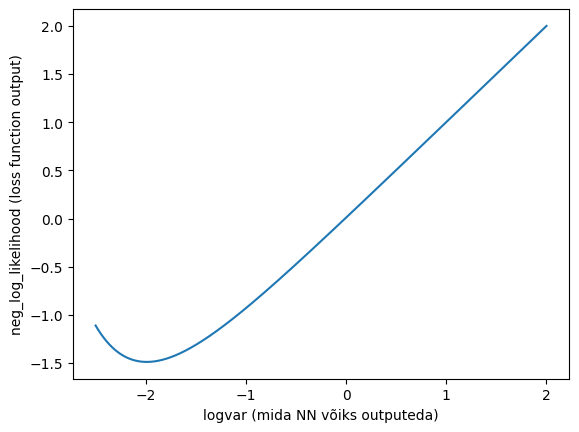

In [51]:
plt.plot(uuringuruum, tul)
plt.xlabel("logvar (mida NN võiks outputeda)")
plt.ylabel("neg_log_likelihood (loss function output)")
plt.show()

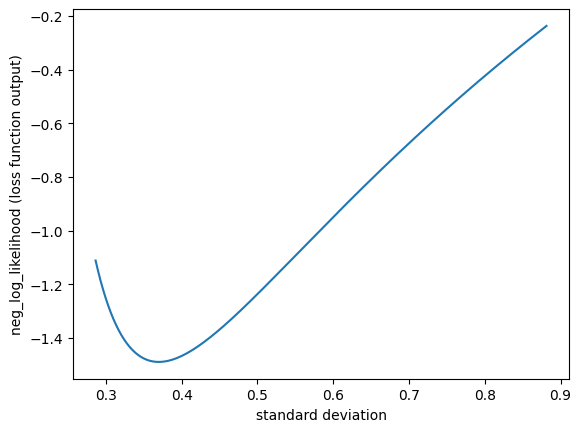

In [60]:
plt.plot((np.exp(uuringuruum)**0.5)[:500], tul[:500])
plt.xlabel("standard deviation")
plt.ylabel("neg_log_likelihood (loss function output)")
plt.show()

## Tegelik variance vs hinnatud variance (from neg_log_loss)

In [83]:
hinnatudstd = list()
tegelikstd = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65,
              0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.]

for sigma in tegelikstd:

    logvar = np.log(sigma**2)
    print(f"sigma: {sigma}, logvar: {logvar:.2f}")

    y_train = np.random.normal(0, sigma, 1000)
    if sigma <= 0.1:
        uuringuruum = np.linspace(-7, -1, 1000)
    else:
        uuringuruum = np.linspace(-3, 2, 1000)
    tul = []

    for i in uuringuruum:
        tul.append(utils.neg_log_likelihood(
            y_train, np.tile([0, i], (len(y_train), 1))))

    print("minimum, logvar, sigma")
    print(np.min(tul), uuringuruum[np.argmin(tul)],
          np.exp(uuringuruum[np.argmin(tul)])**0.5)

    hinnatudstd.append(np.exp(uuringuruum[np.argmin(tul)])**0.5)


sigma: 0.05, logvar: -5.99
minimum, logvar, sigma
-2.1495408790054586 -2.651651651651652 0.26558354275303836
sigma: 0.1, logvar: -4.61
minimum, logvar, sigma
-1.468851016806247 -1.9669669669669672 0.37400598333132223
sigma: 0.15, logvar: -3.79
minimum, logvar, sigma
-1.0498833311819171 -1.5485485485485486 0.46103824693536344
sigma: 0.2, logvar: -3.22
minimum, logvar, sigma
-0.7409467875869618 -1.2432432432432432 0.537072802185861
sigma: 0.25, logvar: -2.77
minimum, logvar, sigma
-0.5422091999384956 -1.043043043043043 0.5936166599783643
sigma: 0.3, logvar: -2.41
minimum, logvar, sigma
-0.3503337799504839 -0.8478478478478477 0.6544736698036945
sigma: 0.35, logvar: -2.10
minimum, logvar, sigma
-0.19236527119121022 -0.6926926926926926 0.7072674851718095
sigma: 0.4, logvar: -1.83
minimum, logvar, sigma
-0.10208049218630104 -0.6026026026026026 0.7398548199403869
sigma: 0.45, logvar: -1.60
minimum, logvar, sigma
0.05299129278663923 -0.44744744744744747 0.7995359966863643
sigma: 0.5, logvar: -

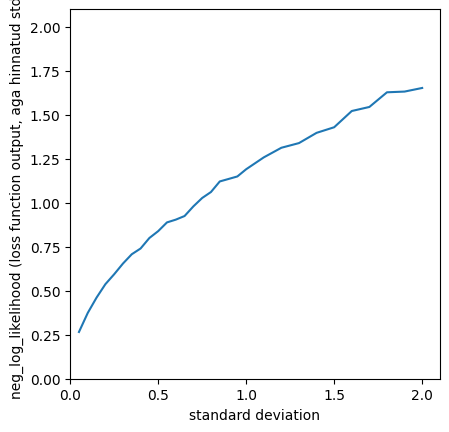

In [108]:
plt.plot(tegelikstd, hinnatudstd)
plt.axis("square")
plt.xlim(0, 2.1)
plt.ylim(0, 2.1)
plt.xlabel("standard deviation")
plt.ylabel("neg_log_likelihood (loss function output, aga hinnatud std)")
plt.show()

In [85]:
from scipy.optimize import minimize    

In [109]:
utils.neg_log_likelihood(y_train, np.tile([0, 0.3], (len(y_train), 1))).numpy()

0.30561440696962733

1.0512710963760241

In [127]:
import scipy.optimize as sco
import scipy.stats as scs

In [181]:

type(y_train)
y_train.shape

(1000,)

In [187]:
print(type([[0, i] for _ in range(1000)]))
print(len([[0, i] for _ in range(1000)]))
print(type([[0, i] for _ in range(1000)][0]))
print(len([[0, i] for _ in range(1000)][0]))

<class 'list'>
1000
<class 'list'>
2


In [199]:
for i in np.linspace(-2.5, 2, 1000):
    tul.append(utils.neg_log_likelihood(y_train, np.asarray([[0, 1.0] for _ in range(1000)])))

In [207]:
np.float64(1)

1.0

In [240]:
def leia_min_kadu(logvar):
    global y_train
    # objective on leida vähim logvar, mis annab neg_log_likelihoodi minimumi kätte
    # print("logvar on " + logvar)
    # sys.stdout.flush()
    sigma_guess = np.exp(logvar)**0.5
    # # print(logvar)
    # print("sigmaguess on " + sigma_guess)
    # sys.stdout.flush()
    # print('Hello from the child process')
    # sys.stdout.flush()

    ret_val = utils.neg_log_likelihood2(
        y_train, np.asarray([[0, np.float64(sigma_guess)] for _ in range(1000)])).numpy()
    # print(ret_val)
    return (ret_val)


tegelikstd = np.linspace(0.05, 5, 200)
scipy_var = []
for std in tegelikstd:
    y_train = np.random.normal(0, std, 1000)
    res = sco.minimize(leia_min_kadu, [0.2],)
    #print(res)
    scipy_var.append(res.x[0])

In [247]:
np.max(np.exp(scipy_var)**0.5)

5.097999321549598

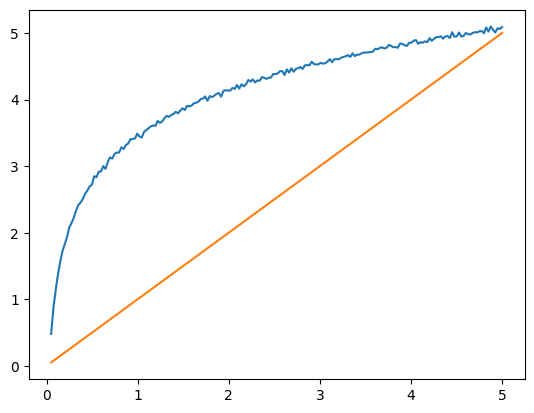

In [276]:
plt.plot(tegelikstd, np.exp(scipy_var)**0.5)
plt.plot(tegelikstd, tegelikstd)
plt.show()

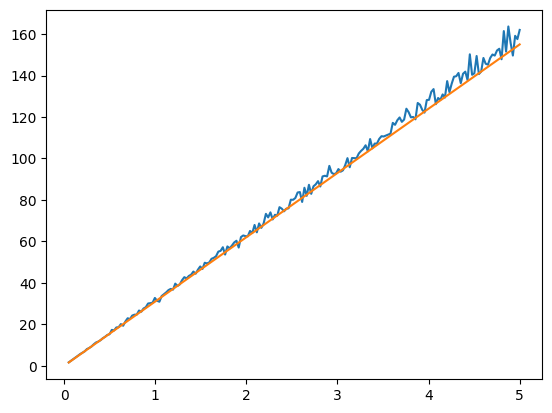

In [281]:
plt.plot(tegelikstd, np.exp(np.exp(scipy_var)**0.5))
plt.plot(tegelikstd, tegelikstd*np.pi**3)

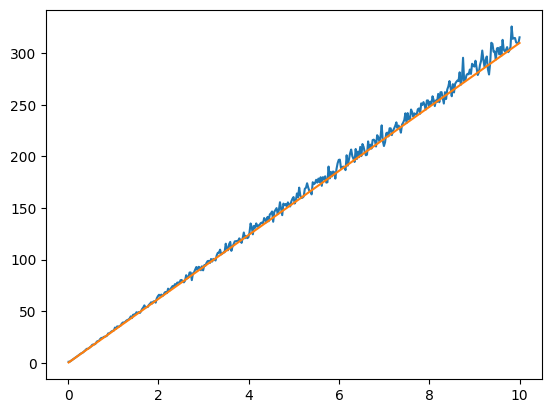

In [282]:
tegelikstd = np.linspace(0.01, 10, 400)
log_var_scipy2 = []
for std in tegelikstd:
    y_train = np.random.normal(0, std, 1000)
    res = sco.minimize(leia_min_kadu, [0.2],)
    #print(res)
    log_var_scipy2.append(res.x[0])
    
plt.plot(tegelikstd, np.exp(np.exp(log_var_scipy2)**0.5))
plt.plot(tegelikstd, tegelikstd*np.pi**3)

In [295]:
std = 10
mini, maxi = 10, 0.01
for i in range(100):
    y_train = np.random.normal(0, std, 1000)
    res = sco.minimize(leia_min_kadu, [0.2],)
    mini = min(mini, res.x[0])
    maxi = max(maxi, res.x[0])

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

In [296]:
print(mini, maxi, maxi-mini)

3.4813063246810505 3.517766636053372 0.03646031137232164


In [299]:
(maxi-mini)/mini

0.010473169543809694

In [302]:
(np.exp(np.exp(3.517766636053372)**0.5) - np.exp(np.exp(3.4813063246810505)**0.5)) /np.exp(np.exp(3.4813063246810505)**0.5)

0.11058226914294493

# Vastuseks on np.log(tegelikstd)+ 3*np.log(np.pi)?

In [308]:
3*np.log(np.pi)

3.4341896575482007

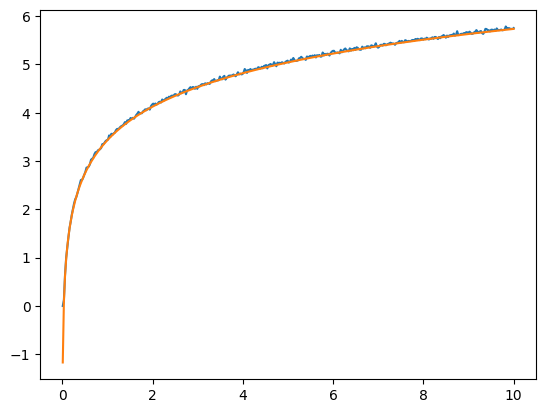

In [310]:
plt.plot(tegelikstd, np.exp(log_var_scipy2)**0.5)
plt.plot(tegelikstd, np.log(tegelikstd)+ 3*np.log(np.pi))

# Kasutame seda neglogloss2

In [311]:
def leia_min_kadu2(logvar):
    global y_train
    sigma_guess = np.exp(logvar)**0.5
    ret_val = utils.neg_log_likelihood2(
        y_train, np.asarray([[0, np.float64(sigma_guess)] for _ in range(1000)])).numpy()
    # print(ret_val)
    return (ret_val)

# tegelikstd = np.linspace(0.05, 5, 200)
# scipy_var = []
# for std in tegelikstd:
#     y_train = np.random.normal(0, std, 1000)
#     res = sco.minimize(leia_min_kadu2, [0.2],)
#     #print(res)
#     scipy_var.append(res.x[0])

In [313]:
tegelikstd = np.linspace(0.01, 10, 100)
log_var_scipy3 = []
for std in tegelikstd:
    y_train = np.random.normal(0, std, 1000)
    res = sco.minimize(leia_min_kadu2, [0.2],)
    log_var_scipy3.append(res.x[0])
    
plt.plot(tegelikstd, np.exp(np.exp(log_var_scipy3)**0.5))
plt.plot(tegelikstd, tegelikstd*np.pi**3)

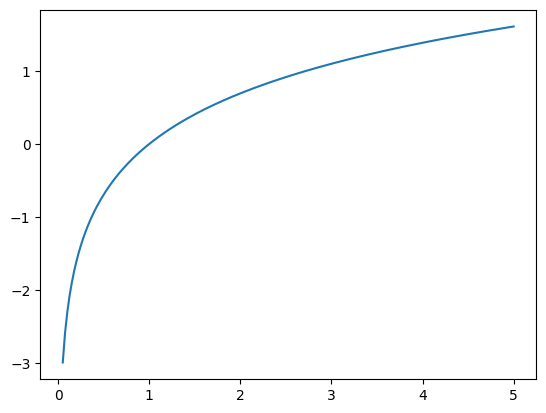

In [244]:
plt.plot(np.linspace(0.05, 5, 200), np.log(np.linspace(0.05, 5, 200)))

In [168]:
def squared(x):
    return tf.reduce_sum(tf.square(x))

res = sco.minimize(squared, 100)
res.x

array([-7.45122473e-09])

In [ ]:

# hinnatudstd = list()
# tegelikstd = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65,
#               0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.]

# for sigma in tegelikstd:

#     logvar = np.log(sigma**2)
#     print(f"sigma: {sigma}, logvar: {logvar:.2f}")

#     y_train = np.random.normal(0, sigma, 1000)
#     if sigma <= 0.1:
#         uuringuruum = np.linspace(-7, -1, 1000)
#     else:
#         uuringuruum = np.linspace(-3, 2, 1000)
#     tul = []

#     for i in uuringuruum:
#         tul.append(utils.neg_log_likelihood(
#             y_train, np.tile([0, i], (len(y_train), 1))))

#     print("minimum, logvar, sigma")
#     print(np.min(tul), uuringuruum[np.argmin(tul)],
#           np.exp(uuringuruum[np.argmin(tul)])**0.5)

#     hinnatudstd.append(np.exp(uuringuruum[np.argmin(tul)])**0.5)

In [ ]:
tul = []
y_train = np.random.normal(0, 0.1, 1000)


for i in np.linspace(-2.5, 2, 1000):
    tul.append(utils.neg_log_likelihood2(y_train, np.asarray([[0, i] for _ in range(1000)])))
plt.plot(np.linspace(-2.5, 2, 1000), tul)
print(np.min(tul), np.linspace(-2.5, 2, 1000)[np.argmin(tul)]) # np.argmin(tul),
print(np.exp(np.linspace(-2.5, 2, 1000)[np.argmin(tul)])**0.5 )# hinnatud variance